<a href="https://colab.research.google.com/github/AI4Finance-Foundation/FinRL/blob/master/Stock_NeurIPS2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Reinforcement Learning for Stock Trading from Scratch: Multiple Stock Trading

* **Pytorch Version** 



# Content

* [1. Task Description](#0)
* [2. Install Python packages](#1)
    * [2.1. Install Packages](#1.1)    
    * [2.2. A List of Python Packages](#1.2)
    * [2.3. Import Packages](#1.3)
    * [2.4. Create Folders](#1.4)
* [3. Download and Preprocess Data](#2)
* [4. Preprocess Data](#3)        
    * [4.1. Technical Indicators](#3.1)
    * [4.2. Perform Feature Engineering](#3.2)
* [5. Build Market Environment in OpenAI Gym-style](#4)  
    * [5.1. Data Split](#4.1)  
    * [5.3. Environment for Training](#4.2)    
* [6. Train DRL Agents](#5)
* [7. Backtesting Performance](#6)  
    * [7.1. BackTestStats](#6.1)
    * [7.2. BackTestPlot](#6.2)   
  

<a id='0'></a>
# Part 1. Task Discription

We train a DRL agent for stock trading. This task is modeled as a Markov Decision Process (MDP), and the objective function is maximizing (expected) cumulative return.

We specify the state-action-reward as follows:

* **State s**: The state space represents an agent's perception of the market environment. Just like a human trader analyzing various information, here our agent passively observes many features and learns by interacting with the market environment (usually by replaying historical data).

* **Action a**: The action space includes allowed actions that an agent can take at each state. For example, a ∈ {−1, 0, 1}, where −1, 0, 1 represent
selling, holding, and buying. When an action operates multiple shares, a ∈{−k, ..., −1, 0, 1, ..., k}, e.g.. "Buy
10 shares of AAPL" or "Sell 10 shares of AAPL" are 10 or −10, respectively

* **Reward function r(s, a, s′)**: Reward is an incentive for an agent to learn a better policy. For example, it can be the change of the portfolio value when taking a at state s and arriving at new state s',  i.e., r(s, a, s′) = v′ − v, where v′ and v represent the portfolio values at state s′ and s, respectively


**Market environment**: 30 consituent stocks of Dow Jones Industrial Average (DJIA) index. Accessed at the starting date of the testing period.


The data for this case study is obtained from Yahoo Finance API. The data contains Open-High-Low-Close price and volume.


<a id='1'></a>
# Part 2. Install Python Packages

<a id='1.1'></a>
## 2.1. Install packages


In [50]:
pip install tensorboardX -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 722.0 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 251.9 kB/s eta 0:00:00a 0:00:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.22.1
    Uninstalling protobuf-4.22.1:
      Successfully uninstalled protobuf-4.22.1
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install git+https://github.com/quantopian/pyfolio

  Cloning https://github.com/quantopian/pyfolio to /private/var/folders/7r/pjnxt1996652rrwvcc6gx2740000gn/T/pip-req-build-07lgtbx_
  Running command git clone --filter=blob:none --quiet https://github.com/quantopian/pyfolio /private/var/folders/7r/pjnxt1996652rrwvcc6gx2740000gn/T/pip-req-build-07lgtbx_
  Resolved https://github.com/quantopian/pyfolio to commit 4b901f6d73aa02ceb6d04b7d83502e5c6f2e81aa
  Preparing metadata (setup.py) ... done


  Created wheel for pyfolio: filename=pyfolio-0.9.2+75.g4b901f6-py3-none-any.whl size=75760 sha256=2d3ba438bf7c7d158631106d65da4485d7ac451b3047dbd02ed0217cb68b5f5e
  Stored in directory: /private/var/folders/7r/pjnxt1996652rrwvcc6gx2740000gn/T/pip-ephem-wheel-cache-7zn6ki57/wheels/03/00/1c/647b2b1a87981bb9ce79040685d203386303338628a36992f3
Successfully built pyfolio
Note: you may need to restart the kernel to use updated packages.


In [3]:
## install finrl library
!pip install wrds -i https://pypi.tuna.tsinghua.edu.cn/simple
!pip install swig -i https://pypi.tuna.tsinghua.edu.cn/simple
!pip install git+https://github.com/AI4Finance-Foundation/FinRL.git 

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/36/2b/64986e5a8911fd1c51cbb2e8ae8367970baf52f420ec31787dc9118ed4bd/wrds-3.1.6-py3-none-any.whl (12 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 2.9 MB/s eta 0:00:00a 0:00:01
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 1.2 MB/s eta 0:00:0000:0100:010m
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Cloning https://github.com/AI4Finance-Foundation/FinRL.git to /private/var/folders/7r/pjnxt1996652rrwvcc6gx2740000gn/T/pip-req-build-k01kymra
  Running command git clone --filter=blob:none --quiet https://github.com/AI4Finance-Foundation/FinRL.git /private/var/folders/7r/pjnxt1996652rrwvcc6gx2740000gn/T/pip-req-build-k01kymra
  Resolved https://github.com/AI4Finance-Foundation/FinRL.git to commit 49c20651d3ed6fd53f55e47ec0e7ae5504ee9a7b
  Installing build dependencies ... 


<a id='1.2'></a>
## 2.2. A list of Python packages 
* Yahoo Finance API
* pandas
* numpy
* matplotlib
* stockstats
* OpenAI gym
* stable-baselines
* tensorflow
* pyfolio

<a id='1.3'></a>
## 2.3. Import Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent
from stable_baselines3.common.logger import configure
from finrl.meta.data_processor import DataProcessor

from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline
from pprint import pprint

import sys
sys.path.append("../FinRL")

import itertools

/Users/hanlinwang/Documents/anaconda/anaconda3/envs/rl_env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/hanlinwang/Documents/anaconda/anaconda3/envs/rl_env/lib/python3.8/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


<a id='1.4'></a>
## 2.4. Create Folders

In [3]:
from finrl import config
from finrl import config_tickers
import os
from finrl.main import check_and_make_directories
from finrl.config import (
    DATA_SAVE_DIR,
    TRAINED_MODEL_DIR,
    TENSORBOARD_LOG_DIR,
    RESULTS_DIR,
    INDICATORS,
    TRAIN_START_DATE,
    TRAIN_END_DATE,
    TEST_START_DATE,
    TEST_END_DATE,
    TRADE_START_DATE,
    TRADE_END_DATE,
)
check_and_make_directories([DATA_SAVE_DIR, TRAINED_MODEL_DIR, TENSORBOARD_LOG_DIR, RESULTS_DIR])



<a id='2'></a>
# Part 3. Download Data
Yahoo Finance provides stock data, financial news, financial reports, etc. Yahoo Finance is free.
* FinRL uses a class **YahooDownloader** in FinRL-Meta to fetch data via Yahoo Finance API
* Call Limit: Using the Public API (without authentication), you are limited to 2,000 requests per hour per IP (or up to a total of 48,000 requests a day).



-----
class YahooDownloader:
    Retrieving daily stock data from
    Yahoo Finance API

    Attributes
    ----------
        start_date : str
            start date of the data (modified from config.py)
        end_date : str
            end date of the data (modified from config.py)
        ticker_list : list
            a list of stock tickers (modified from config.py)

    Methods
    -------
    fetch_data()


In [5]:
# from config.py, TRAIN_START_DATE is a string
TRAIN_START_DATE
# from config.py, TRAIN_END_DATE is a string
TRAIN_END_DATE

'2020-02-28'

In [4]:
TRAIN_START_DATE = '2010-10-10'
TRAIN_END_DATE = '2020-02-28'
TRADE_START_DATE = '2020-03-01'
TRADE_END_DATE = '2023-02-28'


In [6]:
import tushare as ts
ts.set_token('6314756019e50a6672690e5a78b2dbf7cfcd27c6f6a6b48a8cf76dae')
pro = ts.pro_api()

In [85]:
#选择上证50指数的成分股
df_index = pro.index_weight(index_code='000016.sh', start_date='20101010', end_date='20230228')
df_index.to_csv('SSE_50_index_weight.csv',index=0)

In [97]:
#选择某个时间点的上证50指数作为固定跟踪股票
sort_date = '20200228' #自定义的时间点为每个月的月末
df_sort = df_index[df_index['trade_date']==sort_date]
sort_SSEindex = df_sort['con_code'].unique()
print(sort_SSEindex,len(sort_SSEindex))

['603993.SH' '603259.SH' '601989.SH' '601988.SH' '601939.SH' '601888.SH'
 '601857.SH' '601818.SH' '601766.SH' '601688.SH' '601668.SH' '601628.SH'
 '601601.SH' '601398.SH' '601390.SH' '601336.SH' '601328.SH' '601319.SH'
 '601318.SH' '601288.SH' '601236.SH' '601211.SH' '601186.SH' '601166.SH'
 '601138.SH' '601111.SH' '601088.SH' '601066.SH' '601012.SH' '600887.SH'
 '600837.SH' '600703.SH' '600690.SH' '600585.SH' '600547.SH' '600519.SH'
 '600340.SH' '600309.SH' '600276.SH' '600196.SH' '600104.SH' '600050.SH'
 '600048.SH' '600036.SH' '600031.SH' '600030.SH' '600028.SH' '600016.SH'
 '600009.SH' '600000.SH'] 50


In [73]:
#如果选择从config中配置可以用这段代码快速更改后缀
# new = []
# for c in config_tickers.SSE_50_TICKER:
#     c = c.replace('XSHG','SH')
#     new.append(c)
# print(new,len(new))

['600000.SH', '600036.SH', '600104.SH', '600030.SH', '601628.SH', '601166.SH', '601318.SH', '601328.SH', '601088.SH', '601857.SH', '601601.SH', '601668.SH', '601288.SH', '601818.SH', '601989.SH', '601398.SH', '600048.SH', '600028.SH', '600050.SH', '600519.SH', '600016.SH', '600887.SH', '601688.SH', '601186.SH', '601988.SH', '601211.SH', '601336.SH', '600309.SH', '603993.SH', '600690.SH', '600276.SH', '600703.SH', '600585.SH', '603259.SH', '601888.SH', '601138.SH', '600196.SH', '601766.SH', '600340.SH', '601390.SH', '601939.SH', '601111.SH', '600029.SH', '600019.SH', '601229.SH', '601800.SH', '600547.SH', '601006.SH', '601360.SH', '600606.SH', '601319.SH', '600837.SH', '600031.SH', '601066.SH', '600009.SH', '601236.SH', '601012.SH', '600745.SH', '600588.SH', '601658.SH', '601816.SH', '603160.SH'] 62


In [96]:
#Download选定时间点的sse50成分股数据
df_ts1 =pd.DataFrame()
for c in sort_SSEindex:
    temp=pro.daily(ts_code=c,start_date='20101010',end_date='20230228')
    df_ts1=pd.concat([df_ts1,temp])
print(df_ts1)

        ts_code trade_date   open   high    low  close  pre_close  change  \
0     603993.SH   20230228   5.91   5.95   5.83   5.90       5.87    0.03   
1     603993.SH   20230227   5.91   5.99   5.81   5.87       5.99   -0.12   
2     603993.SH   20230224   6.11   6.13   5.95   5.99       6.17   -0.18   
3     603993.SH   20230223   6.17   6.23   6.07   6.17       6.14    0.03   
4     603993.SH   20230222   6.13   6.21   6.07   6.14       6.18   -0.04   
...         ...        ...    ...    ...    ...    ...        ...     ...   
2973  600000.SH   20101015  14.32  15.29  14.29  15.25      14.39    0.86   
2974  600000.SH   20101014  14.51  15.00  14.34  14.39      14.44   -0.05   
2975  600000.SH   20101013  13.97  14.49  13.88  14.44      13.96    0.48   
2976  600000.SH   20101012  13.83  13.98  13.70  13.96      13.89    0.07   
2977  600000.SH   20101011  13.37  14.05  13.36  13.89      13.36    0.53   

      pct_chg         vol       amount  
0      0.5111   923517.82   543744

In [98]:
df_ts1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136970 entries, 0 to 2977
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ts_code     136970 non-null  object 
 1   trade_date  136970 non-null  object 
 2   open        136970 non-null  float64
 3   high        136970 non-null  float64
 4   low         136970 non-null  float64
 5   close       136970 non-null  float64
 6   pre_close   136970 non-null  float64
 7   change      136970 non-null  float64
 8   pct_chg     136970 non-null  float64
 9   vol         136970 non-null  float64
 10  amount      136970 non-null  float64
dtypes: float64(9), object(2)
memory usage: 12.5+ MB


In [48]:
#保存下载的50只成分股为CSV文件
df_ts1.to_csv('sse_50_201010_20230228.csv',index=0)

In [109]:
#检验50只股票的信息缺省的时间点和个数
dimatch_num = 0
dimatch_date =[]
for c in df_ts1['trade_date'].unique():
    temp = df_ts1[df_ts1['trade_date'] == c]
    if len(temp) != 50:
        dimatch_num +=1
        dimatch_date.append(c)
print(dimatch_num,dimatch_date)

2170 ['20220408', '20220126', '20220125', '20220124', '20220121', '20220120', '20220119', '20210930', '20210929', '20210928', '20210927', '20210924', '20210803', '20210802', '20210730', '20210729', '20210728', '20210727', '20210624', '20210623', '20210622', '20210621', '20210618', '20210617', '20210616', '20210615', '20210611', '20210610', '20210218', '20210210', '20210209', '20210208', '20210205', '20210204', '20210203', '20210202', '20210201', '20210129', '20200930', '20200731', '20200730', '20200609', '20191030', '20190704', '20190703', '20190702', '20190701', '20190628', '20190627', '20190626', '20190625', '20190624', '20190621', '20190620', '20190619', '20190618', '20190617', '20190614', '20190613', '20190612', '20190611', '20190610', '20190606', '20190605', '20190604', '20190603', '20190531', '20190530', '20190529', '20190528', '20190527', '20190524', '20190523', '20190522', '20190521', '20190520', '20190517', '20190516', '20190515', '20190514', '20190513', '20190510', '20190509'

In [165]:
#获取SSE的交易日历
import exchange_calendars as tc
def get_trading_days(exchange: str, start_date: str, end_date: str):
    days =pro.trade_cal(exchange=exchange, start_date=start_date, end_date=end_date)
    return days
trading_days = get_trading_days(exchange='SSE',start_date='20101010', end_date='20230228')
trading_days = trading_days[trading_days['is_open'] == 1]
full_date_range = pd.DataFrame({'trade_date':trading_days['cal_date']})
full_date_range['trade_date'] = full_date_range['trade_date'].astype(str)
#full_date_range = pd.DataFrame({'trade_date':pd.date_range(trading_days['cal_date'].min(),trading_days['cal_date'].max())})
print(full_date_range)

     trade_date
0      20230228
1      20230227
4      20230224
5      20230223
6      20230222
...         ...
4519   20101015
4520   20101014
4521   20101013
4522   20101012
4523   20101011

[3013 rows x 1 columns]


In [166]:
full_date_range.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3013 entries, 0 to 4523
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   trade_date  3013 non-null   object
dtypes: object(1)
memory usage: 47.1+ KB


In [253]:
#遍历扩充50只股票的完整交易日期
# def add_exchange_calendars(df:'DataFrame',sort_SSEindex:'list',full_date_range:'DataFrame'):
for tic in sort_SSEindex:
    temp_df = df_ts1[df_ts1['ts_code'] == tic]
    temp_full_date_range = full_date_range
#   temp_df = temp_df.set_index('trade_date')
#   temp_df['trade_date'] = pd.to_datetime(temp_df['trade_date'],format='%Y%m%d')
    temp_df = temp_df.set_index('trade_date')
#   temp_df = temp_df.reindex(full_date_range)
#   temp_full_date_range['trade_date'] = pd.to_datetime(full_date_range['trade_date'],format='%Y%m%d')
    temp_full_date_range = temp_full_date_range.set_index('trade_date')
    temp_df = pd.merge(temp_full_date_range,temp_df,how='left',left_index=True,right_index=True)
    temp_df = temp_df.reset_index().sort_values('trade_date',ascending=True)
    temp_df = temp_df.fillna({
        'amount' : 0,
        'vol': 0,
        'pct_chg': 0,
        'change':0,
        'ts_code': tic
    })
#     print(temp_df)
    for i in range(len(temp_df)):
#         print(temp_df.loc[i,'close'])
        if pd.isna(temp_df.loc[i,'close']):
            j = i -1
            while pd.isna(temp_df.loc[j,'close']):
                j = j - 1
            if j > 0 :
#                 print(temp_df.loc[j,'open'])
                #print(temp_df.loc[j,'close'])
                temp_df.loc[i,['close','open','high','low','pre_close']] = temp_df.loc[j,'close']
        
#     for i in range(len(temp_df)):
#         if temp_df.loc[i,'ts_code'] == None:
#             temp_df.loc[i,'ts_code'] == tic
#             if temp_df.loc[i,'amount'] == None:
#                 temp_df.loc[i,['amount','vol','pct_chg','change']] == 0
#                 if temp_df.loc[i,'close'] == None:
#                     temp_df.loc[i,['close','open','high','low','close','pre_close']] == temp_df.loc[i-1,'close']                                    
    print(temp_df)
#     file_name = 'df_'+ str(tic) +'.csv'
#     temp_df.to_csv(file_name,index=False)
        
#add_exchange_calendars(df = df_ts1,sort_SSEindex = sort_SSEindex,full_date_range = full_date_range)

     trade_date    ts_code  open  high   low  close  pre_close  change  \
3012   20101011  603993.SH  9.63  9.63  9.63   9.63       9.63    0.00   
3011   20101012  603993.SH  9.63  9.63  9.63   9.63       9.63    0.00   
3010   20101013  603993.SH  9.63  9.63  9.63   9.63       9.63    0.00   
3009   20101014  603993.SH  9.63  9.63  9.63   9.63       9.63    0.00   
3008   20101015  603993.SH  9.63  9.63  9.63   9.63       9.63    0.00   
...         ...        ...   ...   ...   ...    ...        ...     ...   
4      20230222  603993.SH  6.13  6.21  6.07   6.14       6.18   -0.04   
3      20230223  603993.SH  6.17  6.23  6.07   6.17       6.14    0.03   
2      20230224  603993.SH  6.11  6.13  5.95   5.99       6.17   -0.18   
1      20230227  603993.SH  5.91  5.99  5.81   5.87       5.99   -0.12   
0      20230228  603993.SH  5.91  5.95  5.83   5.90       5.87    0.03   

      pct_chg         vol       amount  
3012   0.0000        0.00        0.000  
3011   0.0000        0.00    

     trade_date    ts_code  open  high   low  close  pre_close  change  \
3012   20101011  601766.SH  5.77  5.97  5.71   5.79       5.81   -0.02   
3011   20101012  601766.SH  5.79  5.93  5.74   5.80       5.79    0.01   
3010   20101013  601766.SH  5.82  6.35  5.78   6.15       5.80    0.35   
3009   20101014  601766.SH  6.12  6.30  6.03   6.17       6.15    0.02   
3008   20101015  601766.SH  6.17  6.47  6.11   6.39       6.17    0.22   
...         ...        ...   ...   ...   ...    ...        ...     ...   
4      20230222  601766.SH  5.59  5.73  5.58   5.68       5.61    0.07   
3      20230223  601766.SH  5.69  5.71  5.63   5.67       5.68   -0.01   
2      20230224  601766.SH  5.68  5.73  5.67   5.70       5.67    0.03   
1      20230227  601766.SH  5.69  5.70  5.60   5.64       5.70   -0.06   
0      20230228  601766.SH  5.67  5.71  5.63   5.70       5.64    0.06   

      pct_chg         vol      amount  
3012  -0.3400  1014188.10  591445.310  
3011   0.1700   438797.69  2548

     trade_date    ts_code   open   high    low  close  pre_close  change  \
3012   20101011  601336.SH  26.44  26.44  26.44  26.44      26.44    0.00   
3011   20101012  601336.SH  26.44  26.44  26.44  26.44      26.44    0.00   
3010   20101013  601336.SH  26.44  26.44  26.44  26.44      26.44    0.00   
3009   20101014  601336.SH  26.44  26.44  26.44  26.44      26.44    0.00   
3008   20101015  601336.SH  26.44  26.44  26.44  26.44      26.44    0.00   
...         ...        ...    ...    ...    ...    ...        ...     ...   
4      20230222  601336.SH  31.30  31.66  31.25  31.41      31.63   -0.22   
3      20230223  601336.SH  31.27  31.73  31.19  31.33      31.41   -0.08   
2      20230224  601336.SH  31.22  31.36  30.77  31.00      31.33   -0.33   
1      20230227  601336.SH  30.89  31.06  30.59  30.76      31.00   -0.24   
0      20230228  601336.SH  30.71  31.26  30.61  31.17      30.76    0.41   

      pct_chg       vol      amount  
3012   0.0000      0.00       0.000  

     trade_date    ts_code   open   high    low  close  pre_close  change  \
3012   20101011  601211.SH  28.38  28.38  28.38  28.38      28.38    0.00   
3011   20101012  601211.SH  28.38  28.38  28.38  28.38      28.38    0.00   
3010   20101013  601211.SH  28.38  28.38  28.38  28.38      28.38    0.00   
3009   20101014  601211.SH  28.38  28.38  28.38  28.38      28.38    0.00   
3008   20101015  601211.SH  28.38  28.38  28.38  28.38      28.38    0.00   
...         ...        ...    ...    ...    ...    ...        ...     ...   
4      20230222  601211.SH  14.41  14.50  14.35  14.39      14.50   -0.11   
3      20230223  601211.SH  14.41  14.57  14.39  14.46      14.39    0.07   
2      20230224  601211.SH  14.44  14.47  14.25  14.28      14.46   -0.18   
1      20230227  601211.SH  14.22  14.29  14.18  14.20      14.28   -0.08   
0      20230228  601211.SH  14.24  14.32  14.17  14.29      14.20    0.09   

      pct_chg        vol      amount  
3012   0.0000       0.00       0.000

     trade_date    ts_code   open   high    low  close  pre_close  change  \
3012   20101011  601066.SH   7.80   7.80   7.80   7.80       7.80    0.00   
3011   20101012  601066.SH   7.80   7.80   7.80   7.80       7.80    0.00   
3010   20101013  601066.SH   7.80   7.80   7.80   7.80       7.80    0.00   
3009   20101014  601066.SH   7.80   7.80   7.80   7.80       7.80    0.00   
3008   20101015  601066.SH   7.80   7.80   7.80   7.80       7.80    0.00   
...         ...        ...    ...    ...    ...    ...        ...     ...   
4      20230222  601066.SH  26.94  27.30  26.59  26.78      27.10   -0.32   
3      20230223  601066.SH  26.79  27.38  26.79  26.97      26.78    0.19   
2      20230224  601066.SH  26.95  26.95  26.46  26.51      26.97   -0.46   
1      20230227  601066.SH  26.31  26.55  26.01  26.28      26.51   -0.23   
0      20230228  601066.SH  26.37  26.78  26.30  26.78      26.28    0.50   

      pct_chg        vol      amount  
3012   0.0000       0.00       0.000

     trade_date    ts_code    open    high     low   close  pre_close  change  \
3012   20101011  600309.SH   17.69   18.35   17.57   17.81      17.57    0.24   
3011   20101012  600309.SH   17.80   19.20   17.65   19.10      17.81    1.29   
3010   20101013  600309.SH   19.05   19.50   18.75   19.24      19.10    0.14   
3009   20101014  600309.SH   19.26   19.38   18.30   18.69      19.24   -0.55   
3008   20101015  600309.SH   18.53   19.25   18.16   19.00      18.69    0.31   
...         ...        ...     ...     ...     ...     ...        ...     ...   
4      20230222  600309.SH  106.01  107.26  102.98  103.20     106.80   -3.60   
3      20230223  600309.SH  103.10  104.43  101.81  102.69     103.20   -0.51   
2      20230224  600309.SH  102.14  103.28  101.50  101.74     102.69   -0.95   
1      20230227  600309.SH  101.33  104.98  101.08  102.85     101.74    1.11   
0      20230228  600309.SH  103.45  104.90  102.56  104.26     102.85    1.41   

      pct_chg        vol   

     trade_date    ts_code   open   high    low  close  pre_close  change  \
3012   20101011  600030.SH  11.38  12.42  11.32  12.42      11.29    1.13   
3011   20101012  600030.SH  12.65  12.95  12.37  12.93      12.42    0.51   
3010   20101013  600030.SH  12.80  12.93  12.66  12.84      12.93   -0.09   
3009   20101014  600030.SH  13.02  14.12  13.02  13.65      12.84    0.81   
3008   20101015  600030.SH  13.50  14.98  13.38  14.96      13.65    1.31   
...         ...        ...    ...    ...    ...    ...        ...     ...   
4      20230222  600030.SH  21.00  21.10  20.73  20.80      21.09   -0.29   
3      20230223  600030.SH  20.81  21.18  20.81  21.03      20.80    0.23   
2      20230224  600030.SH  21.05  21.09  20.59  20.59      21.03   -0.44   
1      20230227  600030.SH  20.38  20.54  20.30  20.44      20.59   -0.15   
0      20230228  600030.SH  20.50  20.67  20.35  20.65      20.44    0.21   

      pct_chg         vol       amount  
3012  10.0100  3663556.54  4468809

In [9]:
#合并填补缺失值后的SSE50支股票的数据
import glob
file_names = glob.glob('*.csv')
print(file_names,len(file_names))
data_frames = []
for file_name in file_names:
    df_read = pd.read_csv(file_name)
    data_frames.append(df_read)    
merged_df = pd.concat(data_frames,ignore_index=True)
print(merged_df)
merged_df.to_csv('merged_df.csv',index=0)

['df_600016.SH.csv', 'df_601688.SH.csv', 'df_600104.SH.csv', 'df_601138.SH.csv', 'df_600340.SH.csv', 'df_603259.SH.csv', 'df_600690.SH.csv', 'df_600276.SH.csv', 'df_600196.SH.csv', 'df_600887.SH.csv', 'df_601012.SH.csv', 'df_600309.SH.csv', 'df_601939.SH.csv', 'df_601211.SH.csv', 'df_600030.SH.csv', 'df_601628.SH.csv', 'df_601186.SH.csv', 'df_600837.SH.csv', 'df_601989.SH.csv', 'df_601319.SH.csv', 'df_601088.SH.csv', 'df_600036.SH.csv', 'df_600028.SH.csv', 'df_600000.SH.csv', 'df_600585.SH.csv', 'df_600519.SH.csv', 'df_601111.SH.csv', 'df_601390.SH.csv', 'df_601668.SH.csv', 'df_601336.SH.csv', 'df_601236.SH.csv', 'df_600050.SH.csv', 'df_601328.SH.csv', 'df_600009.SH.csv', 'df_600031.SH.csv', 'df_600703.SH.csv', 'df_600547.SH.csv', 'df_601857.SH.csv', 'df_603993.SH.csv', 'df_601766.SH.csv', 'df_601318.SH.csv', 'df_601888.SH.csv', 'df_601988.SH.csv', 'df_600048.SH.csv', 'df_601288.SH.csv', 'df_601818.SH.csv', 'df_601601.SH.csv', 'df_601166.SH.csv', 'df_601066.SH.csv', 'df_601398.SH.csv']

In [7]:
merged_df = pd.read_csv('merged_df.csv')
merged_df

,trade_date,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,20101011,600016.SH,5.21,5.40,5.16,5.33,5.21,0.12,2.3000,3004043.31,1590174.108
1,20101012,600016.SH,5.29,5.32,5.24,5.30,5.33,-0.03,-0.5600,1886108.35,996034.734
2,20101013,600016.SH,5.30,5.42,5.28,5.40,5.30,0.10,1.8900,2404241.84,1290098.213
3,20101014,600016.SH,5.43,5.62,5.43,5.45,5.40,0.05,0.9300,3759846.00,2073607.580
4,20101015,600016.SH,5.43,5.70,5.40,5.69,5.45,0.24,4.4000,4241464.53,2373288.668
...,...,...,...,...,...,...,...,...,...,...,...
150645,20230222,601398.SH,4.32,4.32,4.30,4.30,4.32,-0.02,-0.4630,937519.93,404187.271
150646,20230223,601398.SH,4.31,4.32,4.30,4.30,4.30,0.00,0.0000,1215628.07,523722.564
150647,20230224,601398.SH,4.31,4.31,4.29,4.29,4.30,-0.01,-0.2326,1391182.56,597341.180
150648,20230227,601398.SH,4.29,4.30,4.28,4.29,4.29,0.00,0.0000,1201801.77,515168.670


In [8]:
merged_df = merged_df.rename(columns={'trade_date':'date','ts_code':'tic','vol':'volume'})
merged_df = merged_df[['tic','date','open','high','low','close','pre_close','change','pct_chg','volume','amount']]
merged_df

,tic,date,open,high,low,close,pre_close,change,pct_chg,volume,amount
0,600016.SH,20101011,5.21,5.40,5.16,5.33,5.21,0.12,2.3000,3004043.31,1590174.108
1,600016.SH,20101012,5.29,5.32,5.24,5.30,5.33,-0.03,-0.5600,1886108.35,996034.734
2,600016.SH,20101013,5.30,5.42,5.28,5.40,5.30,0.10,1.8900,2404241.84,1290098.213
3,600016.SH,20101014,5.43,5.62,5.43,5.45,5.40,0.05,0.9300,3759846.00,2073607.580
4,600016.SH,20101015,5.43,5.70,5.40,5.69,5.45,0.24,4.4000,4241464.53,2373288.668
...,...,...,...,...,...,...,...,...,...,...,...
150645,601398.SH,20230222,4.32,4.32,4.30,4.30,4.32,-0.02,-0.4630,937519.93,404187.271
150646,601398.SH,20230223,4.31,4.32,4.30,4.30,4.30,0.00,0.0000,1215628.07,523722.564
150647,601398.SH,20230224,4.31,4.31,4.29,4.29,4.30,-0.01,-0.2326,1391182.56,597341.180
150648,601398.SH,20230227,4.29,4.30,4.28,4.29,4.29,0.00,0.0000,1201801.77,515168.670


In [63]:
df.shape

(94331, 8)

In [9]:
merged_df.sort_values(['trade_date','ts_code'],ignore_index=True).head()

KeyError: 'trade_date'

# Part 4: Preprocess Data
We need to check for missing data and do feature engineering to convert the data point into a state.
* **Adding technical indicators**. In practical trading, various information needs to be taken into account, such as historical prices, current holding shares, technical indicators, etc. Here, we demonstrate two trend-following technical indicators: MACD and RSI.
* **Adding turbulence index**. Risk-aversion reflects whether an investor prefers to protect the capital. It also influences one's trading strategy when facing different market volatility level. To control the risk in a worst-case scenario, such as financial crisis of 2007–2008, FinRL employs the turbulence index that measures extreme fluctuation of asset price.

In [10]:
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    tech_indicator_list = INDICATORS,
                    use_vix=False,
                    use_turbulence=True,
                    user_defined_feature = False)

processed = fe.preprocess_data(merged_df)

/Users/hanlinwang/Documents/GitHub/FinRL/finrl/meta/preprocessor/preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/Users/hanlinwang/Documents/GitHub/FinRL/finrl/meta/preprocessor/preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/Users/hanlinwang/Documents/GitHub/FinRL/finrl/meta/preprocessor/preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/Users/hanlinwang/Documents/GitHub/FinRL/finrl/meta/preprocessor/preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indi

/Users/hanlinwang/Documents/GitHub/FinRL/finrl/meta/preprocessor/preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/Users/hanlinwang/Documents/GitHub/FinRL/finrl/meta/preprocessor/preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/Users/hanlinwang/Documents/GitHub/FinRL/finrl/meta/preprocessor/preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/Users/hanlinwang/Documents/GitHub/FinRL/finrl/meta/preprocessor/preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indi

/Users/hanlinwang/Documents/GitHub/FinRL/finrl/meta/preprocessor/preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/Users/hanlinwang/Documents/GitHub/FinRL/finrl/meta/preprocessor/preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/Users/hanlinwang/Documents/GitHub/FinRL/finrl/meta/preprocessor/preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/Users/hanlinwang/Documents/GitHub/FinRL/finrl/meta/preprocessor/preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indi

/Users/hanlinwang/Documents/GitHub/FinRL/finrl/meta/preprocessor/preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/Users/hanlinwang/Documents/GitHub/FinRL/finrl/meta/preprocessor/preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/Users/hanlinwang/Documents/GitHub/FinRL/finrl/meta/preprocessor/preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/Users/hanlinwang/Documents/GitHub/FinRL/finrl/meta/preprocessor/preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indi

/Users/hanlinwang/Documents/GitHub/FinRL/finrl/meta/preprocessor/preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/Users/hanlinwang/Documents/GitHub/FinRL/finrl/meta/preprocessor/preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/Users/hanlinwang/Documents/GitHub/FinRL/finrl/meta/preprocessor/preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/Users/hanlinwang/Documents/GitHub/FinRL/finrl/meta/preprocessor/preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indi

/Users/hanlinwang/Documents/GitHub/FinRL/finrl/meta/preprocessor/preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/Users/hanlinwang/Documents/GitHub/FinRL/finrl/meta/preprocessor/preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/Users/hanlinwang/Documents/GitHub/FinRL/finrl/meta/preprocessor/preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/Users/hanlinwang/Documents/GitHub/FinRL/finrl/meta/preprocessor/preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indi

/Users/hanlinwang/Documents/GitHub/FinRL/finrl/meta/preprocessor/preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/Users/hanlinwang/Documents/GitHub/FinRL/finrl/meta/preprocessor/preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/Users/hanlinwang/Documents/GitHub/FinRL/finrl/meta/preprocessor/preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/Users/hanlinwang/Documents/GitHub/FinRL/finrl/meta/preprocessor/preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indi

/Users/hanlinwang/Documents/GitHub/FinRL/finrl/meta/preprocessor/preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/Users/hanlinwang/Documents/GitHub/FinRL/finrl/meta/preprocessor/preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/Users/hanlinwang/Documents/GitHub/FinRL/finrl/meta/preprocessor/preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/Users/hanlinwang/Documents/GitHub/FinRL/finrl/meta/preprocessor/preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indi

/Users/hanlinwang/Documents/GitHub/FinRL/finrl/meta/preprocessor/preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/Users/hanlinwang/Documents/GitHub/FinRL/finrl/meta/preprocessor/preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/Users/hanlinwang/Documents/GitHub/FinRL/finrl/meta/preprocessor/preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/Users/hanlinwang/Documents/GitHub/FinRL/finrl/meta/preprocessor/preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indi

/Users/hanlinwang/Documents/GitHub/FinRL/finrl/meta/preprocessor/preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/Users/hanlinwang/Documents/GitHub/FinRL/finrl/meta/preprocessor/preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/Users/hanlinwang/Documents/GitHub/FinRL/finrl/meta/preprocessor/preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/Users/hanlinwang/Documents/GitHub/FinRL/finrl/meta/preprocessor/preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indi

/Users/hanlinwang/Documents/GitHub/FinRL/finrl/meta/preprocessor/preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/Users/hanlinwang/Documents/GitHub/FinRL/finrl/meta/preprocessor/preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/Users/hanlinwang/Documents/GitHub/FinRL/finrl/meta/preprocessor/preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/Users/hanlinwang/Documents/GitHub/FinRL/finrl/meta/preprocessor/preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indi

Successfully added technical indicators
Successfully added turbulence index


In [11]:
list_ticker = processed["tic"].unique().tolist()
# list_date = list(pd.date_range(processed['date'].min(),processed['date'].max()).astype(str))
# combination = list(itertools.product(list_date,list_ticker))

# processed_full = pd.DataFrame(combination,columns=["date","tic"]).merge(processed,on=["date","tic"],how="left")
# processed_full = processed_full[processed_full['date'].isin(processed['date'])]
# processed_full = processed_full.sort_values(['date','tic'])

processed_full = processed

In [10]:
processed_full.sort_values(['date','tic'],ignore_index=True).head(10)

,tic,date,open,high,low,close,pre_close,change,pct_chg,volume,amount,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,turbulence
0,600000.SH,20101011,13.37,14.05,13.36,13.89,13.36,0.53,3.97,1682402.64,2318100.819,0.0,14.023995,13.826005,100.0,66.666667,100.0,13.89,13.89,0.0
1,600009.SH,20101011,12.87,13.33,12.83,13.20,12.85,0.35,2.72,241512.95,317190.089,0.0,14.023995,13.826005,100.0,66.666667,100.0,13.20,13.20,0.0
2,600016.SH,20101011,5.21,5.40,5.16,5.33,5.21,0.12,2.30,3004043.31,1590174.108,0.0,14.023995,13.826005,100.0,66.666667,100.0,5.33,5.33,0.0
3,600028.SH,20101011,8.50,8.73,8.48,8.68,8.44,0.24,2.84,1204924.84,1037966.595,0.0,14.023995,13.826005,100.0,66.666667,100.0,8.68,8.68,0.0
4,600030.SH,20101011,11.38,12.42,11.32,12.42,11.29,1.13,10.01,3663556.54,4468809.244,0.0,14.023995,13.826005,100.0,66.666667,100.0,12.42,12.42,0.0
5,600031.SH,20101011,29.88,30.89,29.50,30.24,29.87,0.37,1.24,357454.82,1077335.937,0.0,14.023995,13.826005,100.0,66.666667,100.0,30.24,30.24,0.0
6,600036.SH,20101011,13.50,14.05,13.47,13.90,13.44,0.46,3.42,1803881.27,2492974.698,0.0,14.023995,13.826005,100.0,66.666667,100.0,13.90,13.90,0.0
7,600048.SH,20101011,12.62,13.53,12.50,13.42,12.72,0.70,5.50,958114.36,1260877.117,0.0,14.023995,13.826005,100.0,66.666667,100.0,13.42,13.42,0.0
8,600050.SH,20101011,5.18,5.31,5.14,5.28,5.17,0.11,2.13,1893750.20,990567.394,0.0,14.023995,13.826005,100.0,66.666667,100.0,5.28,5.28,0.0
9,600104.SH,20101011,17.01,17.46,16.57,17.23,16.99,0.24,1.41,422072.84,716101.739,0.0,14.023995,13.826005,100.0,66.666667,100.0,17.23,17.23,0.0


In [12]:
import datetime
processed_full['date'] = pd.to_datetime(processed_full['date'],format='%Y%m%d')
processed_full

,tic,date,open,high,low,close,pre_close,change,pct_chg,volume,amount,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,turbulence
0,600000.SH,2010-10-11,13.37,14.05,13.36,13.89,13.36,0.53,3.9700,1682402.64,2318100.819,0.000000,14.023995,13.826005,100.000000,66.666667,100.000000,13.890,13.890000,0.000000
1,600009.SH,2010-10-11,12.87,13.33,12.83,13.20,12.85,0.35,2.7200,241512.95,317190.089,0.000000,14.023995,13.826005,100.000000,66.666667,100.000000,13.200,13.200000,0.000000
2,600016.SH,2010-10-11,5.21,5.40,5.16,5.33,5.21,0.12,2.3000,3004043.31,1590174.108,0.000000,14.023995,13.826005,100.000000,66.666667,100.000000,5.330,5.330000,0.000000
3,600028.SH,2010-10-11,8.50,8.73,8.48,8.68,8.44,0.24,2.8400,1204924.84,1037966.595,0.000000,14.023995,13.826005,100.000000,66.666667,100.000000,8.680,8.680000,0.000000
4,600030.SH,2010-10-11,11.38,12.42,11.32,12.42,11.29,1.13,10.0100,3663556.54,4468809.244,0.000000,14.023995,13.826005,100.000000,66.666667,100.000000,12.420,12.420000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150645,601939.SH,2023-02-28,5.60,5.64,5.59,5.64,5.59,0.05,0.8945,349951.06,196505.114,0.003892,5.644186,5.558814,53.841132,34.768020,24.251459,5.608,5.598500,17.077148
150646,601988.SH,2023-02-28,3.22,3.23,3.21,3.23,3.21,0.02,0.6231,853848.32,274898.437,0.009230,3.244136,3.186864,56.543101,30.502269,23.055247,3.215,3.183500,17.077148
150647,601989.SH,2023-02-28,3.71,3.72,3.67,3.71,3.71,0.00,0.0000,608678.00,225131.988,0.033649,3.727424,3.559576,57.644800,116.220187,31.031980,3.610,3.595167,17.077148
150648,603259.SH,2023-02-28,81.90,82.76,81.61,82.68,81.90,0.78,0.9524,142976.89,1175978.986,-1.736381,96.212224,79.885776,45.010565,-134.660434,21.331011,90.187,85.146333,17.077148


<a id='4'></a>
# Part 5. Build A Market Environment in OpenAI Gym-style
The training process involves observing stock price change, taking an action and reward's calculation. By interacting with the market environment, the agent will eventually derive a trading strategy that may maximize (expected) rewards.

Our market environment, based on OpenAI Gym, simulates stock markets with historical market data.

## Data Split
We split the data into training set and testing set as follows:

Training data period: 2009-01-01 to 2020-07-01

Trading data period: 2020-07-01 to 2021-10-31


In [13]:
train = data_split(processed_full, TRAIN_START_DATE,TRAIN_END_DATE)
trade = data_split(processed_full, TRADE_START_DATE,TRADE_END_DATE)
print(len(train))
print(len(trade))

114200
36350


In [69]:
train.tail()

,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
2892,2020-06-30,UNH,288.570007,296.450012,287.660004,286.754181,2932900.0,1.0,-0.019409,302.845852,270.287372,52.413052,-25.866274,1.846804,286.997200,280.002895,30.43,12.91868
2892,2020-06-30,V,191.490005,193.750000,190.160004,190.399994,9040100.0,1.0,1.046932,198.399113,184.714235,53.021030,-51.567968,2.013358,191.146476,181.356466,30.43,12.91868
2892,2020-06-30,VZ,54.919998,55.290001,54.360001,49.750824,17414800.0,1.0,-0.431679,53.248500,48.123875,48.097045,-51.065541,8.508886,50.378309,50.825242,30.43,12.91868
2892,2020-06-30,WBA,42.119999,42.580002,41.759998,38.577274,4782100.0,1.0,-0.082999,42.108876,36.058572,48.830178,-14.542157,1.500723,38.675564,38.477854,30.43,12.91868
2892,2020-06-30,WMT,119.220001,120.129997,118.540001,115.618233,6836400.0,1.0,-0.882725,118.955683,113.018228,48.159687,-69.952600,3.847271,117.276858,119.204112,30.43,12.91868


In [70]:
trade.head()

,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,2020-07-01,AAPL,91.279999,91.839996,90.977501,89.779900,110737200.0,2.0,3.010423,92.570734,80.068735,62.807150,107.494072,29.730532,83.817340,77.609739,28.620001,53.068172
0,2020-07-01,AMGN,235.520004,256.230011,232.580002,238.313568,6575800.0,2.0,3.608528,230.616475,198.678621,61.279625,271.208685,46.806139,213.212113,214.276893,28.620001,53.068172
0,2020-07-01,AXP,95.250000,96.959999,93.639999,91.743042,3301000.0,2.0,-0.387710,110.012242,87.432133,48.504816,-66.321057,3.142448,96.882071,90.357377,28.620001,53.068172
0,2020-07-01,BA,185.880005,190.610001,180.039993,180.320007,49036700.0,2.0,5.443193,220.721139,160.932863,50.925771,24.220608,15.932920,176.472335,155.614168,28.620001,53.068172
0,2020-07-01,CAT,129.380005,129.399994,125.879997,119.817108,2807800.0,2.0,1.263826,129.720782,112.569084,52.865414,35.633500,14.457404,118.586882,112.860602,28.620001,53.068172


In [40]:
INDICATORS

['macd',
 'boll_ub',
 'boll_lb',
 'rsi_30',
 'cci_30',
 'dx_30',
 'close_30_sma',
 'close_60_sma']

In [14]:
stock_dimension = len(train.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")


Stock Dimension: 50, State Space: 501


In [15]:
buy_cost_list = sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount": 1000000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
}


e_train_gym = StockTradingEnv(df = train, **env_kwargs)


## Environment for Training



In [16]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


<a id='5'></a>
# Part 6: Train DRL Agents
* The DRL algorithms are from **Stable Baselines 3**. Users are also encouraged to try **ElegantRL** and **Ray RLlib**.
* FinRL includes fine-tuned standard DRL algorithms, such as DQN, DDPG, Multi-Agent DDPG, PPO, SAC, A2C and TD3. We also allow users to
design their own DRL algorithms by adapting these DRL algorithms.

In [17]:
agent = DRLAgent(env = env_train)

if_using_a2c = False
if_using_ddpg = False
if_using_ppo = True
if_using_td3 = False
if_using_sac = False


In [18]:
import torch
device = torch.device("mps")

### Agent Training: 5 algorithms (A2C, DDPG, PPO, TD3, SAC)


### Agent 1: A2C


In [77]:
agent = DRLAgent(env = env_train)
model_a2c = agent.get_model("a2c")

if if_using_a2c:
  # set up logger
  tmp_path = RESULTS_DIR + '/a2c'
  new_logger_a2c = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_a2c.set_logger(new_logger_a2c)


{'n_steps': 5, 'ent_coef': 0.01, 'learning_rate': 0.0007}
Using cpu device


In [78]:
trained_a2c = agent.train_model(model=model_a2c, 
                             tb_log_name='a2c',
                             total_timesteps=50000) if if_using_a2c else None

### Agent 2: DDPG

In [79]:
agent = DRLAgent(env = env_train)
model_ddpg = agent.get_model("ddpg")

if if_using_ddpg:
  # set up logger
  tmp_path = RESULTS_DIR + '/ddpg'
  new_logger_ddpg = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_ddpg.set_logger(new_logger_ddpg)

{'batch_size': 128, 'buffer_size': 50000, 'learning_rate': 0.001}
Using cpu device


In [80]:
trained_ddpg = agent.train_model(model=model_ddpg, 
                             tb_log_name='ddpg',
                             total_timesteps=50000) if if_using_ddpg else None

### Agent 3: PPO

In [19]:
agent = DRLAgent(env = env_train)
PPO_PARAMS = {
    "n_steps": 2048,
    "ent_coef": 0.01,
    "learning_rate": 0.00025,
    "batch_size": 128,
}
model_ppo = agent.get_model("ppo",model_kwargs = PPO_PARAMS)

if if_using_ppo:
  # set up logger
  tmp_path = RESULTS_DIR + '/ppo'
  new_logger_ppo = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_ppo.set_logger(new_logger_ppo)

{'n_steps': 2048, 'ent_coef': 0.01, 'learning_rate': 0.00025, 'batch_size': 128}
Using cpu device
Logging to results/ppo


In [20]:
trained_ppo = agent.train_model(model=model_ppo, 
                             tb_log_name='ppo',
                             total_timesteps=50000) if if_using_ppo else None

----------------------------------
| time/              |           |
|    fps             | 171       |
|    iterations      | 1         |
|    time_elapsed    | 11        |
|    total_timesteps | 2048      |
| train/             |           |
|    reward          | 1.4877111 |
----------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 172         |
|    iterations           | 2           |
|    time_elapsed         | 23          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.020782031 |
|    clip_fraction        | 0.29        |
|    clip_range           | 0.2         |
|    entropy_loss         | -71         |
|    explained_variance   | -0.0119     |
|    learning_rate        | 0.00025     |
|    loss                 | 5.29        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0299     |
|    reward  

-----------------------------------------
| time/                   |             |
|    fps                  | 173         |
|    iterations           | 12          |
|    time_elapsed         | 141         |
|    total_timesteps      | 24576       |
| train/                  |             |
|    approx_kl            | 0.031488314 |
|    clip_fraction        | 0.276       |
|    clip_range           | 0.2         |
|    entropy_loss         | -71.8       |
|    explained_variance   | -0.0509     |
|    learning_rate        | 0.00025     |
|    loss                 | 13.3        |
|    n_updates            | 110         |
|    policy_gradient_loss | -0.0205     |
|    reward               | -1.3657298  |
|    std                  | 1.02        |
|    value_loss           | 22.5        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 173         |
|    iterations           | 13    

day: 2283, episode: 20
begin_total_asset: 1000000.00
end_total_asset: 1822253.96
total_reward: 822253.96
total_cost: 148099.67
total_trades: 107061
Sharpe: 0.404
----------------------------------------
| time/                   |            |
|    fps                  | 173        |
|    iterations           | 22         |
|    time_elapsed         | 260        |
|    total_timesteps      | 45056      |
| train/                  |            |
|    approx_kl            | 0.03224022 |
|    clip_fraction        | 0.28       |
|    clip_range           | 0.2        |
|    entropy_loss         | -72.7      |
|    explained_variance   | 0.0653     |
|    learning_rate        | 0.00025    |
|    loss                 | 11         |
|    n_updates            | 210        |
|    policy_gradient_loss | -0.0217    |
|    reward               | -1.8184673 |
|    std                  | 1.04       |
|    value_loss           | 17.5       |
----------------------------------------
------------------

### Agent 4: TD3

In [83]:
agent = DRLAgent(env = env_train)
TD3_PARAMS = {"batch_size": 100, 
              "buffer_size": 1000000, 
              "learning_rate": 0.001}

model_td3 = agent.get_model("td3",model_kwargs = TD3_PARAMS)

if if_using_td3:
  # set up logger
  tmp_path = RESULTS_DIR + '/td3'
  new_logger_td3 = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_td3.set_logger(new_logger_td3)

{'batch_size': 100, 'buffer_size': 1000000, 'learning_rate': 0.001}
Using cpu device


In [84]:
trained_td3 = agent.train_model(model=model_td3, 
                             tb_log_name='td3',
                             total_timesteps=30000) if if_using_td3 else None

### Agent 5: SAC

In [103]:
agent = DRLAgent(env = env_train)
SAC_PARAMS = {
    "batch_size": 128,
    "buffer_size": 100000,
    "learning_rate": 0.0001,
    "learning_starts": 100,
    "ent_coef": "auto_0.1",
}

model_sac = agent.get_model("sac",model_kwargs = SAC_PARAMS)

if if_using_sac:
  # set up logger
  tmp_path = RESULTS_DIR + '/sac'
  new_logger_sac = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_sac.set_logger(new_logger_sac)

{'batch_size': 128, 'buffer_size': 100000, 'learning_rate': 0.0001, 'learning_starts': 100, 'ent_coef': 'auto_0.1'}
Using cpu device
Logging to results/sac


In [121]:
trained_sac = agent.train_model(model=model_sac, 
                             tb_log_name='sac',
                             total_timesteps=40000) if if_using_sac else None

day: 2892, episode: 30
begin_total_asset: 1000000.00
end_total_asset: 2919458.30
total_reward: 1919458.30
total_cost: 3183.10
total_trades: 44149
Sharpe: 0.565
-----------------------------------
| time/              |            |
|    episodes        | 4          |
|    fps             | 23         |
|    time_elapsed    | 493        |
|    total_timesteps | 11572      |
| train/             |            |
|    actor_loss      | 89.1       |
|    critic_loss     | 4.98       |
|    ent_coef        | 0.00469    |
|    ent_coef_loss   | -125       |
|    learning_rate   | 0.0001     |
|    n_updates       | 46371      |
|    reward          | -1.9832951 |
-----------------------------------
-----------------------------------
| time/              |            |
|    episodes        | 12         |
|    fps             | 23         |
|    time_elapsed    | 1458       |
|    total_timesteps | 34716      |
| train/             |            |
|    actor_loss      | 36.5       |
|    critic_

## In-sample Performance

Assume that the initial capital is $1,000,000.

### Set turbulence threshold
Set the turbulence threshold to be greater than the maximum of insample turbulence data. If current turbulence index is greater than the threshold, then we assume that the current market is volatile

In [122]:
data_risk_indicator = processed_full[(processed_full.date<TRAIN_END_DATE) & (processed_full.date>=TRAIN_START_DATE)]
insample_risk_indicator = data_risk_indicator.drop_duplicates(subset=['date'])

In [123]:
insample_risk_indicator.vix.describe()

count    2893.000000
mean       18.824245
std         8.489311
min         9.140000
25%        13.330000
50%        16.139999
75%        21.309999
max        82.690002
Name: vix, dtype: float64

In [124]:
insample_risk_indicator.vix.quantile(0.996)

57.40400183105453

In [125]:
insample_risk_indicator.turbulence.describe()

count    2893.000000
mean       34.567961
std        43.790804
min         0.000000
25%        14.962878
50%        24.123915
75%        39.162711
max       652.503481
Name: turbulence, dtype: float64

In [126]:
insample_risk_indicator.turbulence.quantile(0.996)

276.4524426976551

### Trading (Out-of-sample Performance)

We update periodically in order to take full advantage of the data, e.g., retrain quarterly, monthly or weekly. We also tune the parameters along the way, in this notebook we use the in-sample data from 2009-01 to 2020-07 to tune the parameters once, so there is some alpha decay here as the length of trade date extends. 

Numerous hyperparameters – e.g. the learning rate, the total number of samples to train on – influence the learning process and are usually determined by testing some variations.

In [21]:
e_trade_gym = StockTradingEnv(df = trade, turbulence_threshold = 70,risk_indicator_col='turbulence', **env_kwargs)
# env_trade, obs_trade = e_trade_gym.get_sb_env()

In [128]:
trade.head()

,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,2020-07-01,AAPL,91.279999,91.839996,90.977501,89.779900,110737200.0,2.0,3.010423,92.570734,80.068735,62.807150,107.494072,29.730532,83.817340,77.609739,28.620001,53.068172
0,2020-07-01,AMGN,235.520004,256.230011,232.580002,238.313568,6575800.0,2.0,3.608528,230.616475,198.678621,61.279625,271.208685,46.806139,213.212113,214.276893,28.620001,53.068172
0,2020-07-01,AXP,95.250000,96.959999,93.639999,91.743042,3301000.0,2.0,-0.387710,110.012242,87.432133,48.504816,-66.321057,3.142448,96.882071,90.357377,28.620001,53.068172
0,2020-07-01,BA,185.880005,190.610001,180.039993,180.320007,49036700.0,2.0,5.443193,220.721139,160.932863,50.925771,24.220608,15.932920,176.472335,155.614168,28.620001,53.068172
0,2020-07-01,CAT,129.380005,129.399994,125.879997,119.817108,2807800.0,2.0,1.263826,129.720782,112.569084,52.865414,35.633500,14.457404,118.586882,112.860602,28.620001,53.068172


In [22]:
trained_moedl = trained_ppo
df_account_value, df_actions = DRLAgent.DRL_prediction(
    model=trained_moedl, 
    environment = e_trade_gym)

hit end!


In [23]:
df_account_value.shape

(727, 2)

In [37]:
df_account_value.tail()

,date,account_value
722,2023-02-21,914967.47945
723,2023-02-22,912305.06166
724,2023-02-23,910634.16296
725,2023-02-24,907144.63904
726,2023-02-27,909623.46791


In [38]:
df_actions.head()

,600000.SH,600009.SH,600016.SH,600028.SH,600030.SH,600031.SH,600036.SH,600048.SH,600050.SH,600104.SH,...,601688.SH,601766.SH,601818.SH,601857.SH,601888.SH,601939.SH,601988.SH,601989.SH,603259.SH,603993.SH
date,,,,,,,,,,,,,,,,,,,,,
2020-03-02,0,0,12,0,17,0,0,12,0,0,...,0,0,4,0,1,3,0,8,0,4
2020-03-03,0,0,12,0,17,0,0,12,0,0,...,0,0,4,0,1,3,0,8,0,4
2020-03-04,0,0,-24,0,-34,0,0,-24,0,0,...,0,0,-8,0,-2,-6,0,-16,0,-8
2020-03-05,0,0,12,0,17,0,0,12,0,0,...,0,0,4,0,1,3,0,8,0,4
2020-03-06,0,0,12,0,17,0,0,12,0,0,...,0,0,4,0,1,3,0,8,0,4


<a id='6'></a>
# Part 7: Backtesting Results
Backtesting plays a key role in evaluating the performance of a trading strategy. Automated backtesting tool is preferred because it reduces the human error. We usually use the Quantopian pyfolio package to backtest our trading strategies. It is easy to use and consists of various individual plots that provide a comprehensive image of the performance of a trading strategy.

<a id='6.1'></a>
## 7.1 BackTestStats
pass in df_account_value, this information is stored in env class


In [23]:
print("==============Get Backtest Results===========")
#now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value)
perf_stats_all = pd.DataFrame(perf_stats_all)
#perf_stats_all.to_csv("./"+RESULTS_DIR+"/perf_stats_all_"+now+'.csv')

==============Get Backtest Results===========
Annual return         -0.040352
Cumulative returns    -0.112038
Annual volatility      0.076538
Sharpe ratio          -0.500520
Calmar ratio          -0.191795
Stability              0.623593
Max drawdown          -0.210391
Omega ratio            0.867323
Sortino ratio         -0.670079
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.916424
Daily value at risk   -0.009795
dtype: float64


/Users/hanlinwang/Documents/anaconda/anaconda3/envs/rl_env/lib/python3.8/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


In [33]:
baseline_sse = pro.index_daily(ts_code='000016.sh',start_date = '20200301',end_date='20230227')
baseline_sse = baseline_sse.rename(columns={'trade_date':'date'})
baseline_sse = baseline_sse.sort_values('date',ascending=True)
print(baseline_sse)

       ts_code      date      close       open       high        low  \
726  000016.SH  20200302  2907.8863  2837.7737  2922.9511  2837.7737   
725  000016.SH  20200303  2921.4435  2941.6796  2948.5510  2910.7565   
724  000016.SH  20200304  2947.5666  2921.0678  2949.5714  2919.3652   
723  000016.SH  20200305  3018.0701  2966.6862  3023.1232  2956.6513   
722  000016.SH  20200306  2964.8348  2989.7649  2999.4851  2962.4034   
..         ...       ...        ...        ...        ...        ...   
4    000016.SH  20230221  2802.1357  2785.9941  2805.7146  2779.1772   
3    000016.SH  20230222  2769.3440  2786.7187  2795.2446  2766.3587   
2    000016.SH  20230223  2767.5352  2770.7154  2790.8863  2757.4858   
1    000016.SH  20230224  2727.5902  2762.7900  2764.6483  2722.1790   
0    000016.SH  20230227  2723.5835  2713.4250  2738.1200  2712.7882   

     pre_close   change  pct_chg         vol        amount  
726  2821.0419  86.8444   3.0785  54884776.0  8.515178e+07  
725  2907.886

In [34]:
#baseline stats
print("==============Get Baseline Stats===========")
# baseline_df = get_baseline(
#         ticker="^DJI", 
#         start = df_account_value.loc[0,'date'],
#         end = df_account_value.loc[len(df_account_value)-1,'date'])

stats = backtest_stats(baseline_sse, value_col_name = 'close')


==============Get Baseline Stats===========
Annual return         -0.022441
Cumulative returns    -0.063380
Annual volatility      0.201670
Sharpe ratio          -0.012021
Calmar ratio          -0.052178
Stability              0.262203
Max drawdown          -0.430084
Omega ratio            0.997958
Sortino ratio         -0.017063
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.009386
Daily value at risk   -0.025418
dtype: float64


/Users/hanlinwang/Documents/anaconda/anaconda3/envs/rl_env/lib/python3.8/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


In [135]:
df_account_value.loc[0,'date']

'2020-07-01'

In [136]:
df_account_value.loc[len(df_account_value)-1,'date']

'2021-10-28'

In [34]:
df_account_value

,date,account_value
0,2020-03-02,1.000000e+06
1,2020-03-03,1.000457e+06
2,2020-03-04,1.001082e+06
3,2020-03-05,1.001031e+06
4,2020-03-06,1.000572e+06
...,...,...
722,2023-02-21,8.994256e+05
723,2023-02-22,8.955752e+05
724,2023-02-23,8.934475e+05
725,2023-02-24,8.884048e+05


In [33]:
df_account_value.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727 entries, 0 to 726
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           727 non-null    datetime64[ns]
 1   account_value  727 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.5 KB


In [26]:
test_returns = get_daily_return(df_account_value, value_col_name='account_value')
test_returns

date
2020-03-02 00:00:00+00:00         NaN
2020-03-03 00:00:00+00:00    0.000539
2020-03-04 00:00:00+00:00    0.000727
2020-03-05 00:00:00+00:00   -0.000057
2020-03-06 00:00:00+00:00   -0.000408
                               ...   
2023-02-21 00:00:00+00:00   -0.001092
2023-02-22 00:00:00+00:00   -0.004670
2023-02-23 00:00:00+00:00   -0.002715
2023-02-24 00:00:00+00:00   -0.005945
2023-02-27 00:00:00+00:00    0.003867
Name: daily_return, Length: 727, dtype: float64

In [35]:
baseline_returns = get_daily_return(baseline_sse, value_col_name="close")
print(baseline_returns)

date
2020-03-02 00:00:00+00:00         NaN
2020-03-03 00:00:00+00:00    0.004662
2020-03-04 00:00:00+00:00    0.008942
2020-03-05 00:00:00+00:00    0.023919
2020-03-06 00:00:00+00:00   -0.017639
                               ...   
2023-02-21 00:00:00+00:00    0.004928
2023-02-22 00:00:00+00:00   -0.011702
2023-02-23 00:00:00+00:00   -0.000653
2023-02-24 00:00:00+00:00   -0.014433
2023-02-27 00:00:00+00:00   -0.001469
Name: daily_return, Length: 727, dtype: float64


<a id='6.2'></a>
## 7.2 BackTestPlot

In [38]:
import pyfolio
from copy import deepcopy
def backtest_plot_com(
    account_value,
    baseline_start=config.TRADE_START_DATE,
    baseline_end=config.TRADE_END_DATE,
    value_col_name="account_value",
):
    df = deepcopy(account_value)
    df["date"] = pd.to_datetime(df["date"])
    test_returns = get_daily_return(df, value_col_name=value_col_name)
    pro = ts.pro_api()
    baseline_df = pro.index_daily(ts_code='000016.sh',start_date = '20200301',end_date='20230227')
    baseline_df = baseline_df.rename(columns={'trade_date':'date'})
    baseline_df = baseline_df.sort_values('date',ascending=True)
    baseline_returns = get_daily_return(baseline_df, value_col_name="close")
    with pyfolio.plotting.plotting_context(font_scale=1.1):
        pyfolio.create_full_tear_sheet(
            returns=test_returns, benchmark_rets=baseline_returns, set_context=False
        )

==============Compare to SSE50===========


/Users/hanlinwang/Documents/anaconda/anaconda3/envs/rl_env/lib/python3.8/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
/Users/hanlinwang/Documents/anaconda/anaconda3/envs/rl_env/lib/python3.8/site-packages/pyfolio/plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,2020-03-02
End date,2023-02-27
Total months,34
,Backtest
Annual return,-4.035%
Cumulative returns,-11.204%
Annual volatility,7.654%
Sharpe ratio,-0.50
Calmar ratio,-0.19
Stability,0.62
Max drawdown,-21.039%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,21.04,2021-12-24,2022-12-29,NaT,NaN
1,5.09,2021-12-14,2021-12-21,2021-12-24,9
2,4.03,2021-03-18,2021-11-15,2021-12-08,190
3,1.23,2020-08-28,2020-09-09,2020-09-14,12
4,0.97,2020-10-22,2020-11-19,2021-01-22,67


/Users/hanlinwang/Documents/anaconda/anaconda3/envs/rl_env/lib/python3.8/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/Users/hanlinwang/Documents/anaconda/anaconda3/envs/rl_env/lib/python3.8/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/Users/hanlinwang/Documents/anaconda/anaconda3/envs/rl_env/lib/python3.8/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/Users/hanlinwang/Documents/anaconda/anaconda3/envs/rl_env/lib/python3.8/site-p

Stress Events,mean,min,max
New Normal,-0.02%,-3.74%,3.11%


/Users/hanlinwang/Documents/anaconda/anaconda3/envs/rl_env/lib/python3.8/site-packages/pyfolio/timeseries.py:1230: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  period = returns_dupe.loc[start:end]


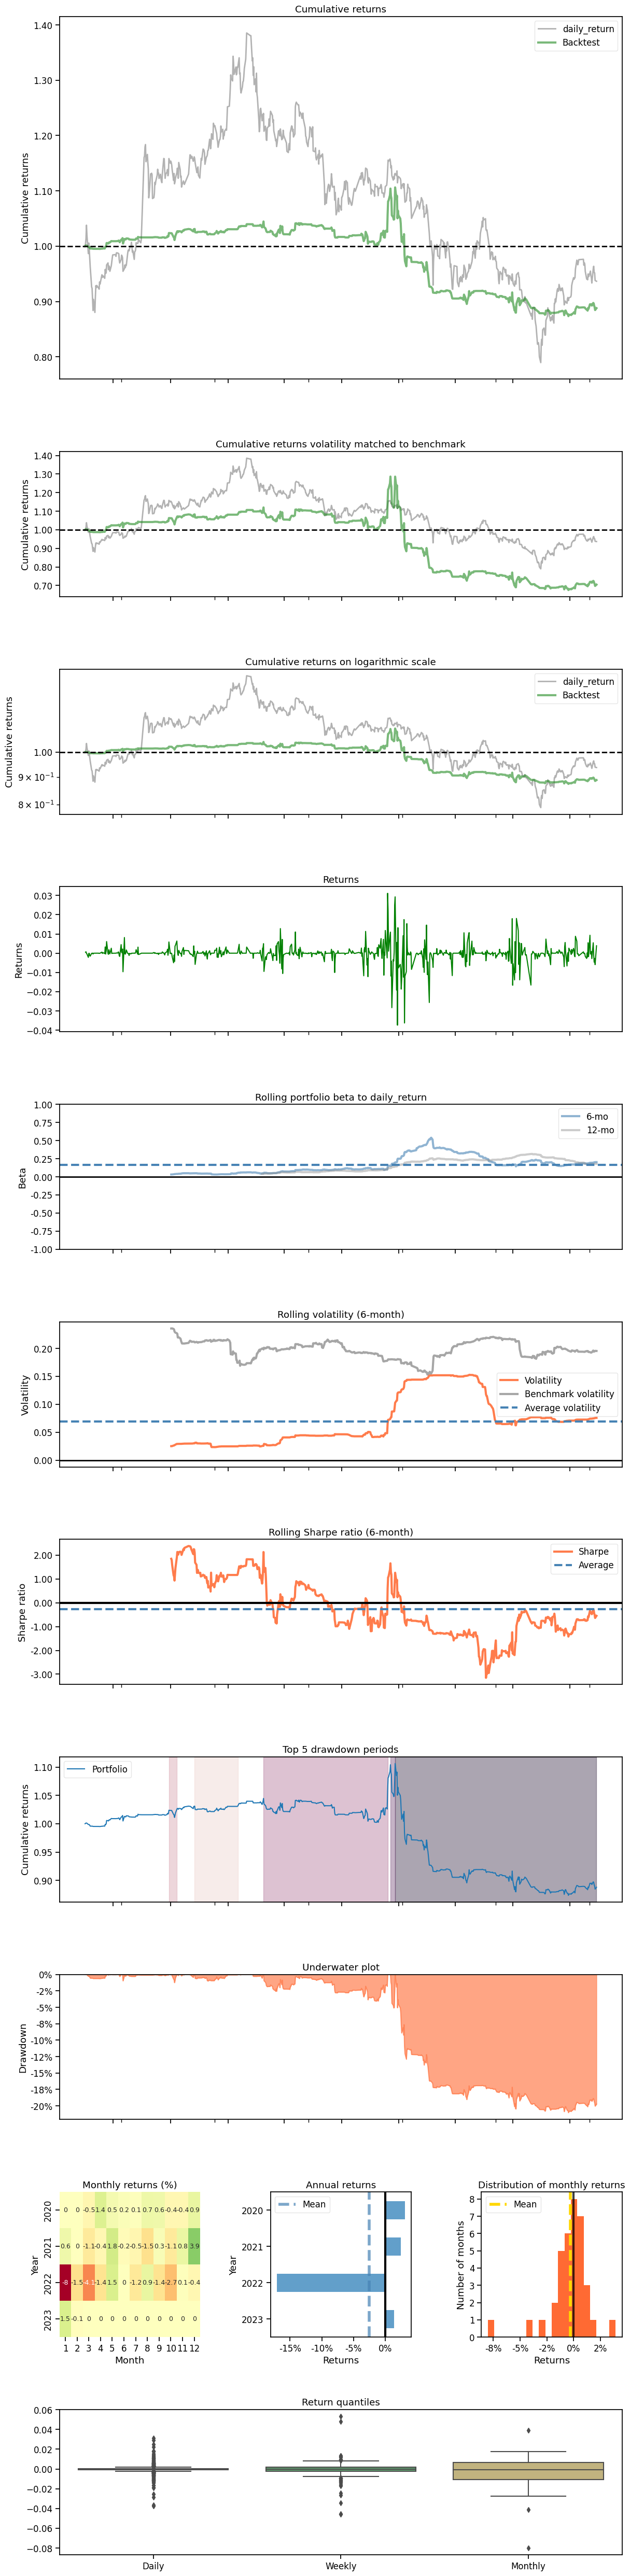

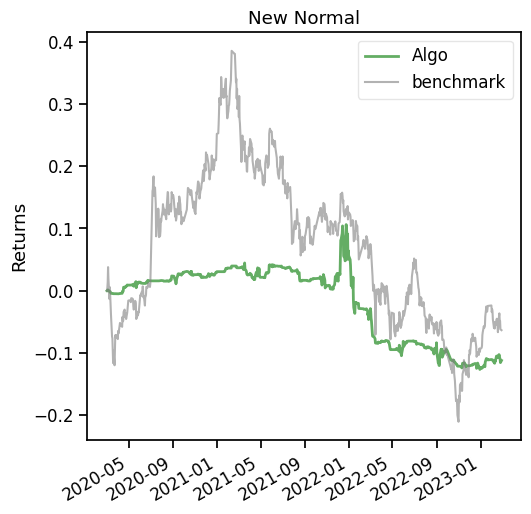

In [39]:
print("==============Compare to SSE50===========")
# from finrl.plot import backtest_plot_com
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
backtest_plot_com(df_account_value, 
             baseline_start = df_account_value.loc[len(df_account_value)-1,'date'],
             baseline_end = df_account_value.loc[0,'date'])